In [1]:
# Phenyl end groups

from rdkit import Chem
from rdkit.Chem import Draw

# phenyl
phenyls = ["c1ccccc1"]
# phenoxy
phenyls += ["O(c1ccccc1)"]
# methylphenyl
phenyls += ["c1ccc(C)cc1"]
# Methylphenoxy
phenyls += ["O(c1ccc(C)cc1)", "O(c1cccc(C)c1)"]
# Nitrophenyl
phenyls += [
    "c1ccc([N+](=O)[O-])cc1",
    "c1ccc([N+](=O)[O-])cc1([N+](=O)[O-])",
]
# cayanophenoxy
phenyls += ["O(c1ccc(C#N)cc1)"]
# fluorophenoxy
phenyls += [
    "O(c1ccc(F)cc1(F))",
    "O(c1cccc(F)c1)",
    "O(c1ccc(F)cc1)",
]
# tiophenoxy
phenyls += ["S(c1ccccc1)"]
# benzoyl
phenyls += ["C(=O)(c1ccccc1)"]

mols = [Chem.MolFromSmiles(x) for x in phenyls]

In [2]:
import pandas as pd
import numpy as np

# Increase back bone C to 5
init = "[*]OC[mask_side][mask_back]C(=O)[*]"

end_groups = ["", "O", "C(=O)O", "C(=O)OC", "N"]
# phenyl end groups
end_groups += phenyls

print(f"Len end groups {len(end_groups)}")

backbone_sidechain = []

for num_back in range(1, 6):
    temp_back = init.replace("[mask_back]", "C" * num_back)
    for num_side in range(6):
        for group in end_groups:
            repl = "(" + "C" * num_side + group + ")"
            if repl != "()":
                temp_side = temp_back.replace("[mask_side]", repl)
                backbone_sidechain.append(
                    dict(
                        num_back=num_back + 2,
                        num_side=num_side,
                        end_group=group,
                        smiles=temp_side,
                    )
                )
            else:
                # no side chain
                temp_side = temp_back.replace("[mask_side]", "")
                backbone_sidechain.append(
                    dict(
                        num_back=num_back + 2,
                        num_side=0,
                        end_group=group,
                        smiles=temp_side,
                    )
                )
combs = pd.DataFrame(backbone_sidechain)
combs

Len end groups 18


num_back  num_side          end_group  \
0           3         0                      
1           3         0                  O   
2           3         0             C(=O)O   
3           3         0            C(=O)OC   
4           3         0                  N   
..        ...       ...                ...   
535         7         5  O(c1ccc(F)cc1(F))   
536         7         5     O(c1cccc(F)c1)   
537         7         5     O(c1ccc(F)cc1)   
538         7         5        S(c1ccccc1)   
539         7         5    C(=O)(c1ccccc1)   

                                         smiles  
0                                [*]OCCC(=O)[*]  
1                             [*]OC(O)CC(=O)[*]  
2                        [*]OC(C(=O)O)CC(=O)[*]  
3                       [*]OC(C(=O)OC)CC(=O)[*]  
4                             [*]OC(N)CC(=O)[*]  
..                                          ...  
535  [*]OC(CCCCCO(c1ccc(F)cc1(F)))CCCCCC(=O)[*]  
536     [*]OC(CCCCCO(c1cccc(F)c1))CCCCCC(=O)[*]  
537     [*]OC(CCCCCO(c1ccc(F)cc1))CCCCCC(=O)[*]  
538        [*]OC(CCCCCS(c1ccccc1))CCCCCC(=O)[*]  
539    [*]OC(CCCCCC(=O)(c1ccccc1))CCCCCC(=O)[*]  

[540 rows x 4 columns]

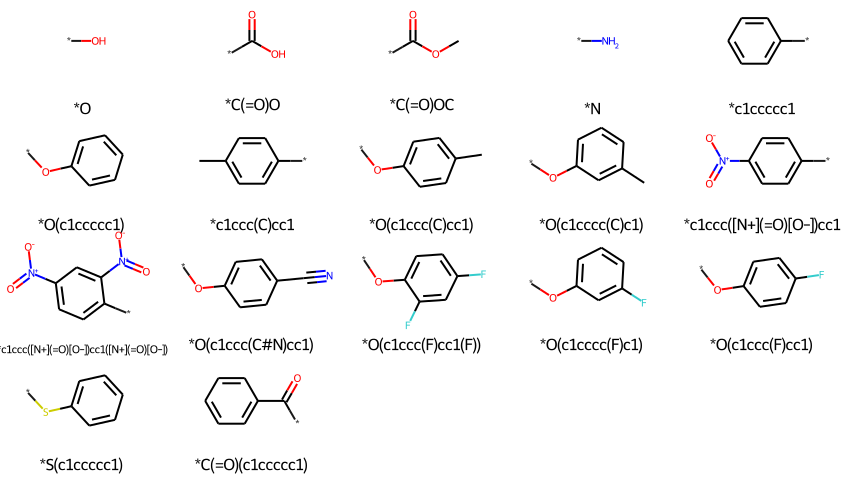

In [3]:
end_groups_plot = [f'*{i}' for i in end_groups[1:]]
mols = [Chem.MolFromSmiles(x) for x in end_groups_plot]
Draw.MolsToGridImage(mols, subImgSize=(170,120), molsPerRow=5, maxMols=100,  useSVG=True, legends=end_groups_plot)


In [4]:
# plot some of the polymers
from rdkit.Chem import rdDepictor
from rdkit import Chem
from rdkit.Chem import Draw
rdDepictor.SetPreferCoordGen(True)

cut = 18*15
sms = combs.iloc[:cut].smiles.values.tolist()
side = combs.iloc[:cut].num_side.values.tolist()
back = combs.iloc[:cut].num_back.values.tolist()
end_group = combs.iloc[:cut].end_group.values.tolist()
leg = []
for s, b, e in zip(side, back, end_group):
    leg.append(f'Cs: {s}, Cb: {b}, End: {e}')
mols = [Chem.MolFromSmiles(x) for x in sms]
Draw.MolsToGridImage(mols, subImgSize=(200,150), molsPerRow=18, maxMols=280,  useSVG=True, legends=leg)


In [5]:
# Create copolymers of PHA and PHA
import itertools
combs = pd.DataFrame(backbone_sidechain)

sms = combs.smiles.values
num_back = combs.num_back.values
num_side = combs.num_side.values
end_group = combs.end_group.values

iterer = lambda x: list(itertools.combinations_with_replacement(x, 2))
smiles = iterer(sms)
num_back = iterer(num_back)
num_side = iterer(num_side)
end_groups = iterer(end_group)
names = iterer(['pha'] * len(sms))

df_pha_pha = pd.DataFrame.from_records([smiles, num_back, num_side, end_groups, names], index=['smiles', 'num_back', 'num_side', 'end_group', 'names']).T
df_pha_pha


smiles num_back num_side  \
0                        ([*]OCCC(=O)[*], [*]OCCC(=O)[*])   (3, 3)   (0, 0)   
1                     ([*]OCCC(=O)[*], [*]OC(O)CC(=O)[*])   (3, 3)   (0, 0)   
2                ([*]OCCC(=O)[*], [*]OC(C(=O)O)CC(=O)[*])   (3, 3)   (0, 0)   
3               ([*]OCCC(=O)[*], [*]OC(C(=O)OC)CC(=O)[*])   (3, 3)   (0, 0)   
4                     ([*]OCCC(=O)[*], [*]OC(N)CC(=O)[*])   (3, 3)   (0, 0)   
...                                                   ...      ...      ...   
146065  ([*]OC(CCCCCO(c1ccc(F)cc1))CCCCCC(=O)[*], [*]O...   (7, 7)   (5, 5)   
146066  ([*]OC(CCCCCO(c1ccc(F)cc1))CCCCCC(=O)[*], [*]O...   (7, 7)   (5, 5)   
146067  ([*]OC(CCCCCS(c1ccccc1))CCCCCC(=O)[*], [*]OC(C...   (7, 7)   (5, 5)   
146068  ([*]OC(CCCCCS(c1ccccc1))CCCCCC(=O)[*], [*]OC(C...   (7, 7)   (5, 5)   
146069  ([*]OC(CCCCCC(=O)(c1ccccc1))CCCCCC(=O)[*], [*]...   (7, 7)   (5, 5)   

                                 end_group       names  
0                                     (, )  (pha, pha)  
1                                    (, O)  (pha, pha)  
2                               (, C(=O)O)  (pha, pha)  
3                              (, C(=O)OC)  (pha, pha)  
4                                    (, N)  (pha, pha)  
...                                    ...         ...  
146065       (O(c1ccc(F)cc1), S(c1ccccc1))  (pha, pha)  
146066   (O(c1ccc(F)cc1), C(=O)(c1ccccc1))  (pha, pha)  
146067          (S(c1ccccc1), S(c1ccccc1))  (pha, pha)  
146068      (S(c1ccccc1), C(=O)(c1ccccc1))  (pha, pha)  
146069  (C(=O)(c1ccccc1), C(=O)(c1ccccc1))  (pha, pha)  

[146070 rows x 5 columns]

In [9]:
sms_conventional = {
 '[*]CC[*]': 'PE',
 '[*]CC([*])C': 'PP',
 '[*]CC([*])CC': 'PB',
 '[*]CC([*])CCC': 'poly(pentylene)',
 '[*]CC([*])CCCC': 'poly(hexylene)',
 '[*]CC([*])C(C)C': '[*]CC([*])C(C)C', 
}

# PET
sms_conventional.update({'[*]CCOC(=O)c1ccc(C(=O)O[*])cc1': 'PET'})
# PEG 
sms_conventional.update({'[*]COC[*]': 'PEG'})
# Starch (amylose), 
# sms_conventional.update({'C([CH]1C([C@@H]([C@H]([C](O1)O[*])O)O)[*])O': 'Starch'})
# PVA
sms_conventional.update({'[*]CC([*])O': 'PVA'})
# PS,
sms_conventional.update({'[*]CC([*])c1ccccc1': 'PS'})
# PVC
sms_conventional.update({'[*]CC([*])Cl': 'PVC'})
# PEN
sms_conventional.update({'[*]CCOC(=O)c1ccc2cc(C(=O)O[*])ccc2c1': 'PEN'})
# nylon 6
sms_conventional.update({'[*]CCCCCC(=O)N[*]': 'Nylon6'})
sms_conventional_list = list(sms_conventional.keys())


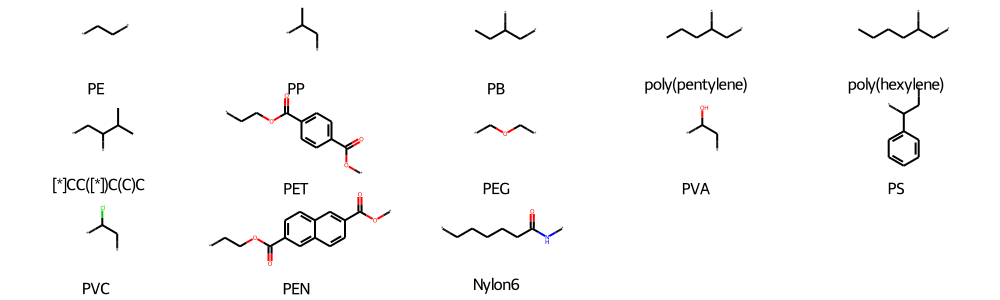

In [10]:
mols = [Chem.MolFromSmiles(x) for x in sms_conventional_list]
Draw.MolsToGridImage(mols, subImgSize=(200,100), molsPerRow=5, maxMols=100,  useSVG=True, legends=list(sms_conventional.values()))


In [11]:
# Create copolymers of PHA and conventional polymers
sms_pha = pd.DataFrame(backbone_sidechain).smiles.values
num_back = pd.DataFrame(backbone_sidechain).num_back.values
num_side = pd.DataFrame(backbone_sidechain).num_side.values
end_group = pd.DataFrame(backbone_sidechain).end_group.values

smiles = list(itertools.product(sms_pha, sms_conventional_list))
num_back = list(itertools.product(num_back, [None] * len(sms_conventional_list)))
num_side = list(itertools.product(num_side, [None] * len(sms_conventional_list)))
end_groups = list(itertools.product(end_group, [None] * len(sms_conventional_list)))
names = list(itertools.product(['pha'] * len(sms_pha), list(sms_conventional.values())))

df_conv_pha = pd.DataFrame.from_records([smiles, num_back, num_side, end_groups, names], index=['smiles', 'num_back', 'num_side', 'end_group', 'names']).T

df_conv_pha


smiles   num_back   num_side  \
0                            ([*]OCCC(=O)[*], [*]CC[*])  (3, None)  (0, None)   
1                         ([*]OCCC(=O)[*], [*]CC([*])C)  (3, None)  (0, None)   
2                        ([*]OCCC(=O)[*], [*]CC([*])CC)  (3, None)  (0, None)   
3                       ([*]OCCC(=O)[*], [*]CC([*])CCC)  (3, None)  (0, None)   
4                      ([*]OCCC(=O)[*], [*]CC([*])CCCC)  (3, None)  (0, None)   
...                                                 ...        ...        ...   
7015  ([*]OC(CCCCCC(=O)(c1ccccc1))CCCCCC(=O)[*], [*]...  (7, None)  (5, None)   
7016  ([*]OC(CCCCCC(=O)(c1ccccc1))CCCCCC(=O)[*], [*]...  (7, None)  (5, None)   
7017  ([*]OC(CCCCCC(=O)(c1ccccc1))CCCCCC(=O)[*], [*]...  (7, None)  (5, None)   
7018  ([*]OC(CCCCCC(=O)(c1ccccc1))CCCCCC(=O)[*], [*]...  (7, None)  (5, None)   
7019  ([*]OC(CCCCCC(=O)(c1ccccc1))CCCCCC(=O)[*], [*]...  (7, None)  (5, None)   

                    end_group                   names  
0                    (, None)               (pha, PE)  
1                    (, None)               (pha, PP)  
2                    (, None)               (pha, PB)  
3                    (, None)  (pha, poly(pentylene))  
4                    (, None)   (pha, poly(hexylene))  
...                       ...                     ...  
7015  (C(=O)(c1ccccc1), None)              (pha, PVA)  
7016  (C(=O)(c1ccccc1), None)               (pha, PS)  
7017  (C(=O)(c1ccccc1), None)              (pha, PVC)  
7018  (C(=O)(c1ccccc1), None)              (pha, PEN)  
7019  (C(=O)(c1ccccc1), None)           (pha, Nylon6)  

[7020 rows x 5 columns]

In [12]:
# We are missing conv - conv copolymers in the search space

conv_conv_copolymers = []
num_back, num_side = [], []
end_groups, names = [], []

for conv, name in zip(sms_conventional_list, sms_conventional.values()):
    conv_conv_copolymers.append((conv, conv))
    num_back.append((None, None))
    num_side.append((None, None))
    end_groups.append((None, None))
    names.append((name, name))

df_conv_conv = pd.DataFrame.from_records([conv_conv_copolymers, num_back, num_side, end_groups, names], index=['smiles', 'num_back', 'num_side', 'end_group', 'names']).T
df_conv_conv

smiles      num_back  \
0                                ([*]CC[*], [*]CC[*])  (None, None)   
1                          ([*]CC([*])C, [*]CC([*])C)  (None, None)   
2                        ([*]CC([*])CC, [*]CC([*])CC)  (None, None)   
3                      ([*]CC([*])CCC, [*]CC([*])CCC)  (None, None)   
4                    ([*]CC([*])CCCC, [*]CC([*])CCCC)  (None, None)   
5                  ([*]CC([*])C(C)C, [*]CC([*])C(C)C)  (None, None)   
6   ([*]CCOC(=O)c1ccc(C(=O)O[*])cc1, [*]CCOC(=O)c1...  (None, None)   
7                              ([*]COC[*], [*]COC[*])  (None, None)   
8                          ([*]CC([*])O, [*]CC([*])O)  (None, None)   
9            ([*]CC([*])c1ccccc1, [*]CC([*])c1ccccc1)  (None, None)   
10                       ([*]CC([*])Cl, [*]CC([*])Cl)  (None, None)   
11  ([*]CCOC(=O)c1ccc2cc(C(=O)O[*])ccc2c1, [*]CCOC...  (None, None)   
12             ([*]CCCCCC(=O)N[*], [*]CCCCCC(=O)N[*])  (None, None)   

        num_side     end_group                               names  
0   (None, None)  (None, None)                            (PE, PE)  
1   (None, None)  (None, None)                            (PP, PP)  
2   (None, None)  (None, None)                            (PB, PB)  
3   (None, None)  (None, None)  (poly(pentylene), poly(pentylene))  
4   (None, None)  (None, None)    (poly(hexylene), poly(hexylene))  
5   (None, None)  (None, None)  ([*]CC([*])C(C)C, [*]CC([*])C(C)C)  
6   (None, None)  (None, None)                          (PET, PET)  
7   (None, None)  (None, None)                          (PEG, PEG)  
8   (None, None)  (None, None)                          (PVA, PVA)  
9   (None, None)  (None, None)                            (PS, PS)  
10  (None, None)  (None, None)                          (PVC, PVC)  
11  (None, None)  (None, None)                          (PEN, PEN)  
12  (None, None)  (None, None)                    (Nylon6, Nylon6)

In [13]:
# Concat all together
all_copos = pd.concat([df_pha_pha, df_conv_pha, df_conv_conv])
all_copos

smiles      num_back  \
0                    ([*]OCCC(=O)[*], [*]OCCC(=O)[*])        (3, 3)   
1                 ([*]OCCC(=O)[*], [*]OC(O)CC(=O)[*])        (3, 3)   
2            ([*]OCCC(=O)[*], [*]OC(C(=O)O)CC(=O)[*])        (3, 3)   
3           ([*]OCCC(=O)[*], [*]OC(C(=O)OC)CC(=O)[*])        (3, 3)   
4                 ([*]OCCC(=O)[*], [*]OC(N)CC(=O)[*])        (3, 3)   
..                                                ...           ...   
8                          ([*]CC([*])O, [*]CC([*])O)  (None, None)   
9            ([*]CC([*])c1ccccc1, [*]CC([*])c1ccccc1)  (None, None)   
10                       ([*]CC([*])Cl, [*]CC([*])Cl)  (None, None)   
11  ([*]CCOC(=O)c1ccc2cc(C(=O)O[*])ccc2c1, [*]CCOC...  (None, None)   
12             ([*]CCCCCC(=O)N[*], [*]CCCCCC(=O)N[*])  (None, None)   

        num_side     end_group             names  
0         (0, 0)          (, )        (pha, pha)  
1         (0, 0)         (, O)        (pha, pha)  
2         (0, 0)    (, C(=O)O)        (pha, pha)  
3         (0, 0)   (, C(=O)OC)        (pha, pha)  
4         (0, 0)         (, N)        (pha, pha)  
..           ...           ...               ...  
8   (None, None)  (None, None)        (PVA, PVA)  
9   (None, None)  (None, None)          (PS, PS)  
10  (None, None)  (None, None)        (PVC, PVC)  
11  (None, None)  (None, None)        (PEN, PEN)  
12  (None, None)  (None, None)  (Nylon6, Nylon6)  

[153103 rows x 5 columns]

In [ ]:
# Example
def predict(sm1, sm2):
    # Must return the property predictions from the predictors
    return 


In [ ]:
from tqdm import tqdm

res = []
fps1 = []
fps2 = []

for num, ent in tqdm(all_copos.iterrows(), total=all_copos.shape[0]):
    
    df = predict(ent['smiles'][0], ent['smiles'][1], False)

    # duplicates 1: smiles_0 == smiles_1, keep first points only, homopolymer
    if ent['smiles'][0] == ent['smiles'][1]:
        df = df.iloc[0:1]
    else:
        # drop all endpoint comp == 1 and comp == 0 because they are included
        df = df.iloc[1:-1]
        
    copy = ['smiles', 'num_side', 'num_back', 'end_group', 'names']
    for co in copy:
        df[co] = [ent[co]] * len(df)
    res.append(df)

res = pd.concat(res, ignore_index=True)
res.to_pickle('predictions.pkl')
res

